<a href="https://colab.research.google.com/github/AdnanAraf/Ai-univers/blob/main/Android_Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install -U matplotlib

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/'
plots_path = folder_path + 'Plots/'
dataset_path = folder_path + 'dataset/'
dataset_file = dataset_path + 'Android_Permission.csv'
unsampled = 'Unsampled'
oversampled = 'Oversampled'
undersampled = 'Undersampled'

In [149]:
np.random.seed(0)

In [150]:
df = pd.read_csv(dataset_file, sep=',')
df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [151]:
df.shape

(29999, 184)

In [152]:
df.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [153]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000,29999.000000,29999.000000,29999.0,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978,0.000300,0.000700,0.0,0.000400,0.000033,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491,0.017318,0.026449,0.0,0.019997,0.005774,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [155]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [156]:
def plot_missing_values(null_columns) :
    plt.xlabel("Column Names")
    plt.ylabel("Mising values")
    plt.xticks(rotation = 30, ha = "right")
    name = 'Columns Name vs Missing Values'
    plt.tight_layout()
    plt.title(name)
    ax = sns.barplot(x = list(null_columns.keys()), y = list(null_columns.values()))
    ax.bar_label(ax.containers[0])
    plt.savefig( plots_path + name + ".png", bbox_inches = 'tight')
    plt.show()

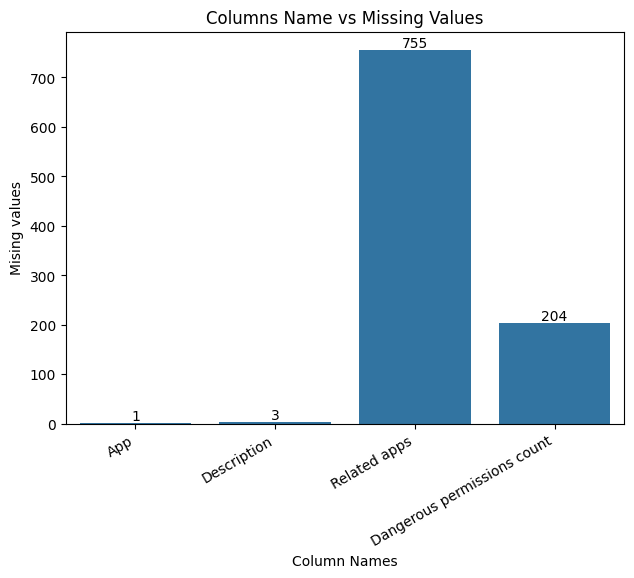

In [157]:
null_sum = dict(df.isna().sum()[df.isna().sum()>0])
plot_missing_values(null_sum)

In [158]:
missing_values_column = df.columns[df.isna().any()]
for c in missing_values_column :
    if df[c].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] :
        df[c].replace(np.nan, np.nanmean(df[c].unique()), inplace=True)

<ipython-input-158-0a8c573495db>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace(np.nan, np.nanmean(df[c].unique()), inplace=True)


In [159]:
def replace_mean(x):
    if x.dtype!='object':
        return x.fillna(x.mean())
    return x

In [160]:
 new_df=df.apply(lambda x: replace_mean(x),axis=1)
 new_df

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,smartstay.beechwood,Travel & Local,"Beechwood is an Android hotel app for guests, ...",5.0,2,0.00,"{com.bluewaterpages, com.travelconnection.luxu...",3.0,1,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,mobi.zstudio.avi.full,Arcade & Action,Explosive Tower Defense!<p>Top Tower Defense G...,4.6,56,2.99,"{com.entwicklerx.swampdefense, com.digimentgam...",3.0,3,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,com.netqin.aotkiller,Tools,Get it for FREE. Quickly Kill running apps. Fr...,4.2,6101,0.00,"{com.guardam.TaskKiller, com.netqin.authtoken_...",4.0,3,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,VMC.Ambassadorhotel,Travel & Local,Key features of this App: <br>1. View photos o...,3.4,5,0.00,"{com.hyxen.app.NewTaipeiTravel, j2ab.android.t...",3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
df_permission = pd.concat([new_df['App'],new_df.iloc[:,10:]],axis=1)
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [162]:
def plot_class_distribution(vals, sample_type) :
    _ , data = np.unique(vals, return_counts = True)
    labels = ['Benign','Malware']
    colors = sns.color_palette('bright')[0:5]
    plt.tight_layout()
    plt.pie(data, labels = labels, colors = colors, autopct = lambda p: '{:.2f}%\n({:.0f})'.format(p, (p/100) * data.sum()))
    name = 'Class Distribution'
    plt.title(name + ' - ' + sample_type, color = 'red')
    plt.savefig(plots_path + sample_type + '/' + name + '.png', bbox_inches='tight')
    plt.show()

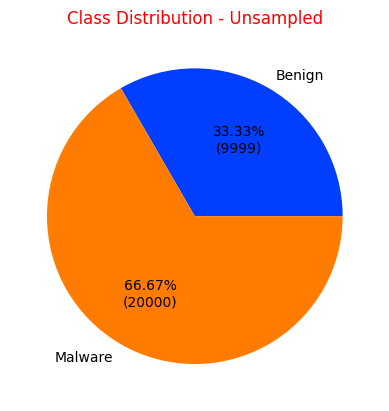

In [163]:
plot_class_distribution(df_permission['Class'], unsampled)

In [164]:
df_permission

,App,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,Beechwood Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29995,ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,Super Task Killer FREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,Ambassador Hotel Taipei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [165]:
df_permission.index = df_permission['App']
df_permission.drop('App', inplace = True, axis = 1)
df_permission

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [166]:
x = df_permission.iloc[1: , : -1]
y = df_permission.iloc[1: , -1]
np.random.seed(0)

In [167]:
x

,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
App,,,,,,,,,,,,,,,,,,,,,
Word Farm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortunes of War FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Better Keyboard: Avatar Purple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boxing Day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ms Claus Live Wallpaper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZDefense: Tower Defense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Super Task Killer FREE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
print(df.isnull().sum())

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64


In [169]:
x = df_permission.iloc[1: , : -1]
y = df_permission.iloc[1: , -1]
np.random.seed(0)

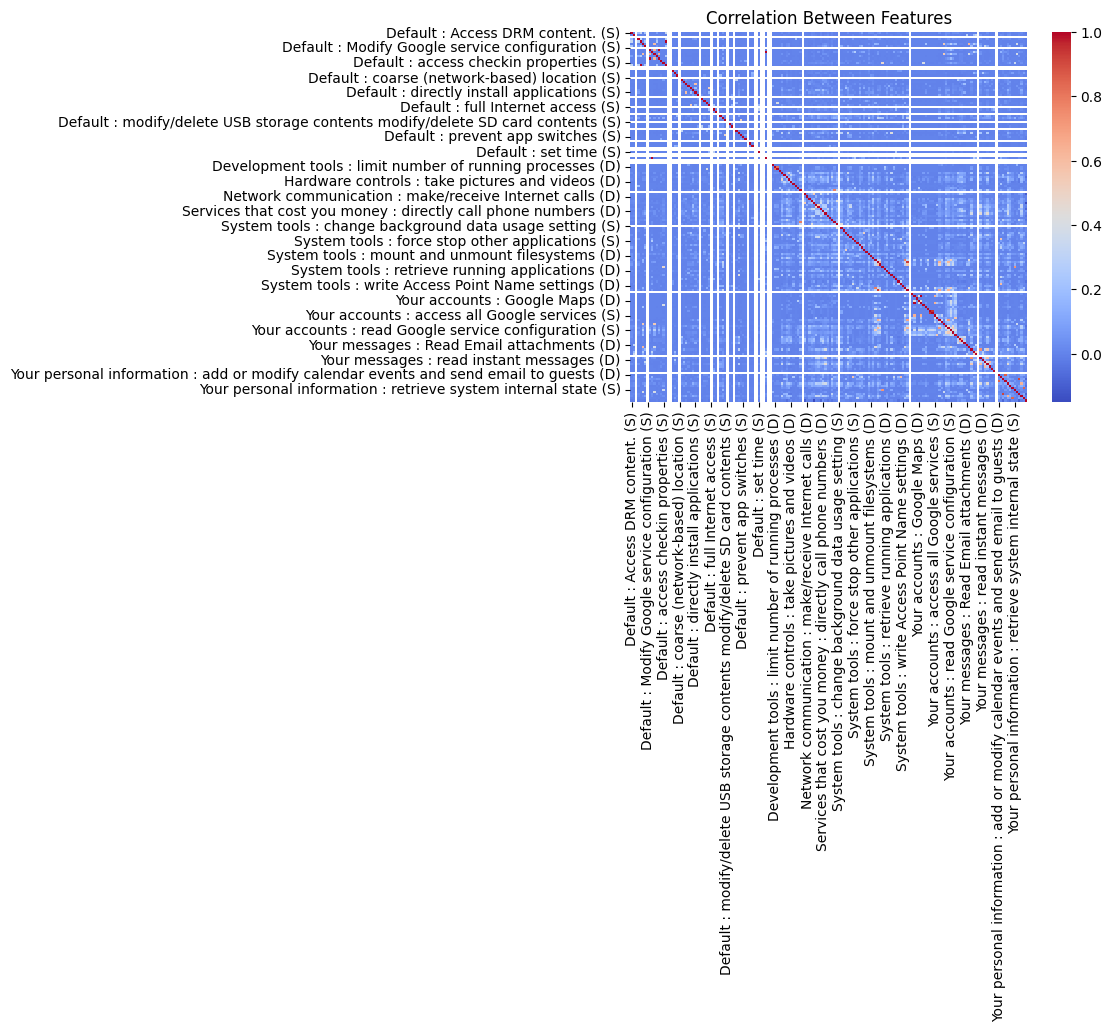

In [170]:
sns.heatmap(df_permission.corr(), cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [171]:
data = df

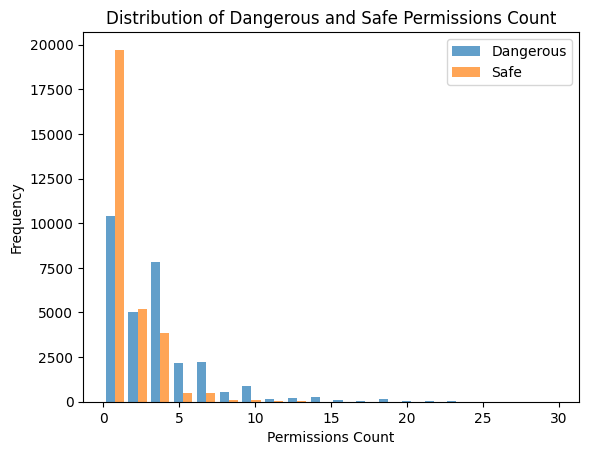

In [172]:
import matplotlib.pyplot as plt

dangerous_permissions = data['Dangerous permissions count']
safe_permissions = data['Safe permissions count']

plt.hist([dangerous_permissions, safe_permissions], label=['Dangerous', 'Safe'], bins=20, alpha=0.7)
plt.title('Distribution of Dangerous and Safe Permissions Count')
plt.xlabel('Permissions Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

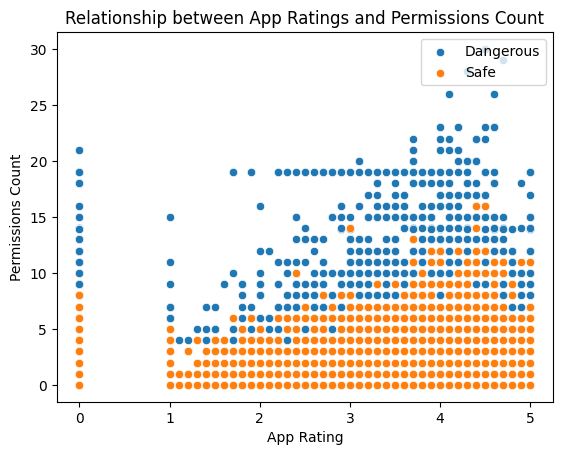

In [173]:
import seaborn as sns

sns.scatterplot(x=data['Rating'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Rating'], y=data['Safe permissions count'], label='Safe')
plt.title('Relationship between App Ratings and Permissions Count')
plt.xlabel('App Rating')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()

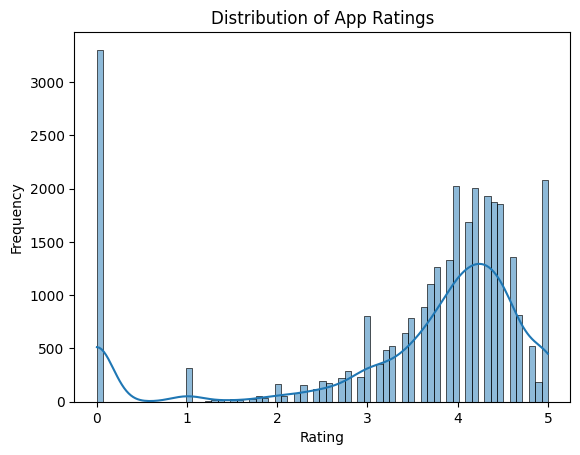

In [257]:
# Analyze the distribution of app ratings:

sns.histplot(data['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

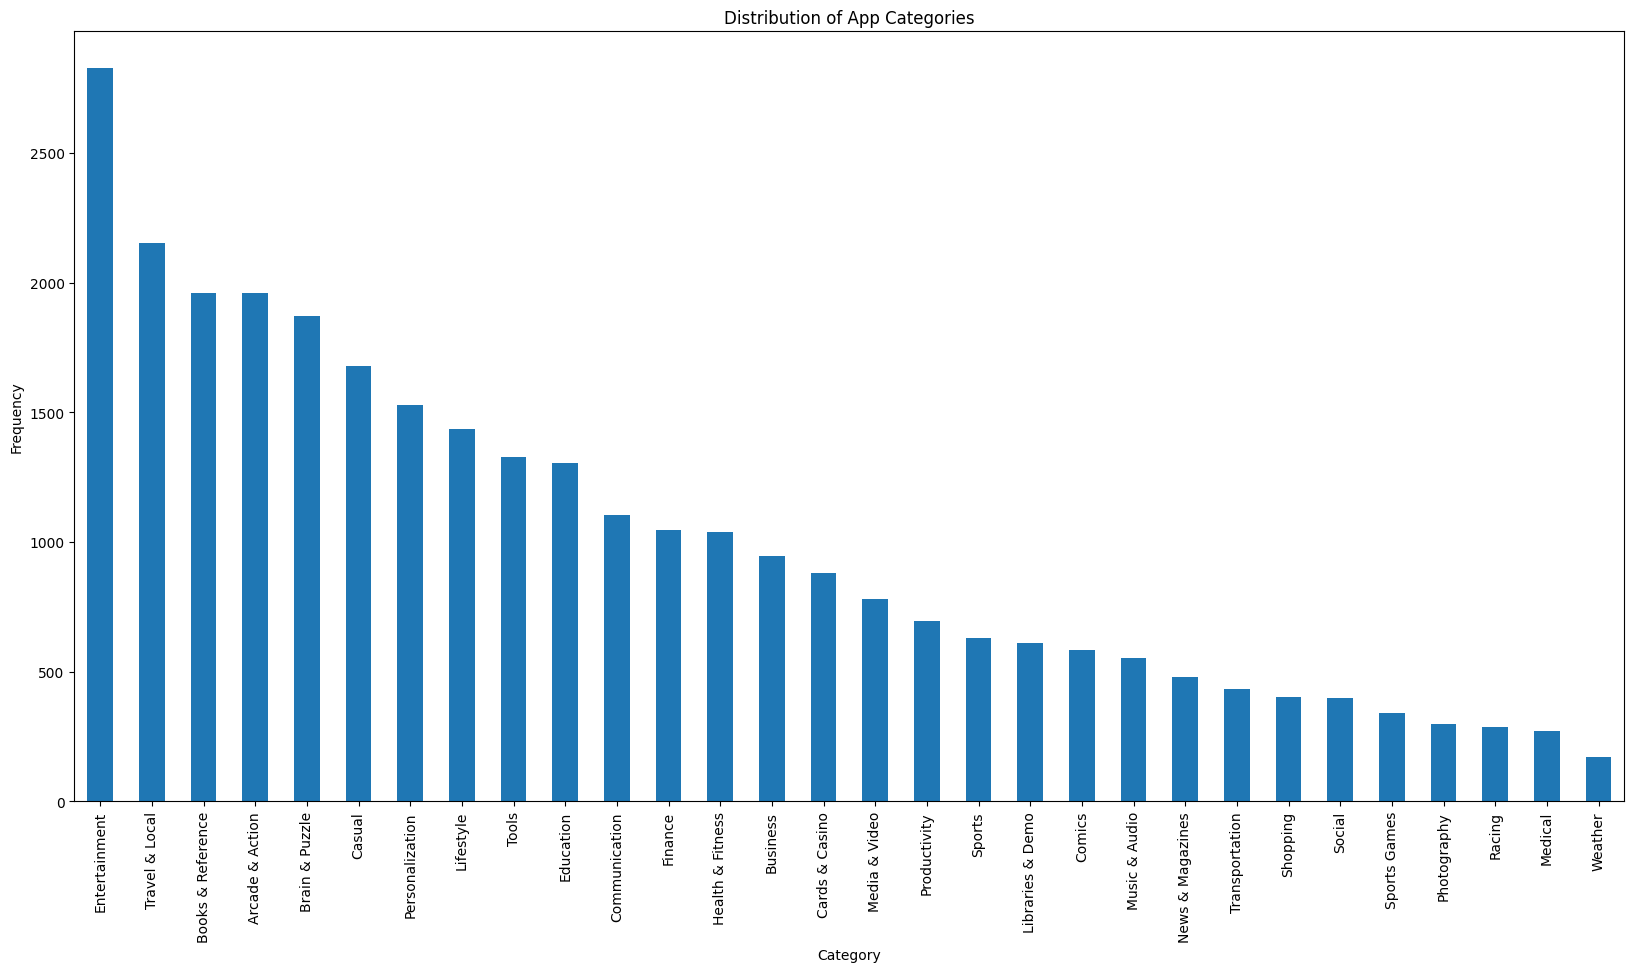

In [258]:
category_counts = data['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(20, 10))
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

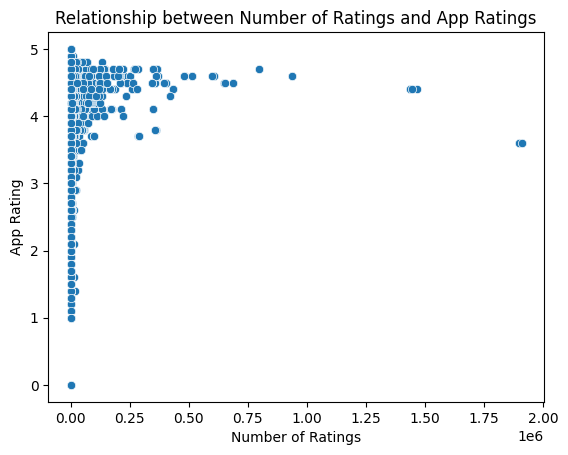

In [261]:
import seaborn as sns

sns.scatterplot(x=data['Number of ratings'], y=data['Rating'])
# plt.figure(figsize=(10, 6))
plt.title('Relationship between Number of Ratings and App Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('App Rating')
plt.show()

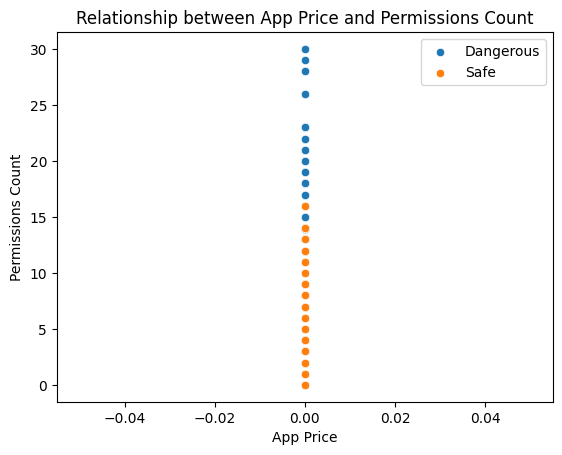

In [260]:
data['Price_numeric'] = data['Price'].apply(lambda x: float(x[1:]) if isinstance(x, str) and x.startswith('$') else 0)

sns.scatterplot(x=data['Price_numeric'], y=data['Dangerous permissions count'], label='Dangerous')
sns.scatterplot(x=data['Price_numeric'], y=data['Safe permissions count'], label='Safe')
# plt.figure(figsize=(10, 6))
plt.title('Relationship between App Price and Permissions Count')
plt.xlabel('App Price')
plt.ylabel('Permissions Count')
plt.legend(loc='upper right')
plt.show()

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [331]:
def logistic(X_train, X_test, y_train, y_test):
    reg = LogisticRegression(max_iter=200, n_jobs=-1).fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    y_predict_train = reg.predict(X_train)

    # Calculate performance metrics
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)

    # Print precision


    # Print metrics
    print(f"Training Accuracy: {precision_train:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Recall Score: {recall:.2f}")
    print(f'ROC AUC Score: {roc_auc:.2f}')

    # Plot ROC curve
    plot_roc_curve(reg, X_test, y_test)

    return reg

def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Training Accuracy: 0.69
Precision: 0.68
Test Accuracy: 0.67
Recall Score: 0.95
ROC AUC Score: 0.53


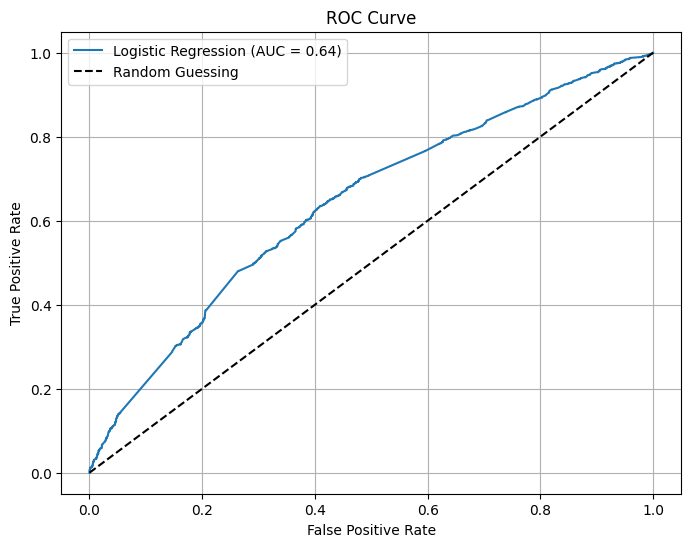

LogisticRegression(max_iter=200, n_jobs=-1)

In [332]:
logistic(X_train, X_test, y_train, y_test)

In [335]:
def Naive(X_train, X_test, y_train, y_test):
    # Train Gaussian Naive Bayes model
    reg = GaussianNB().fit(X_train, y_train)

    # Predict on test and training data
    y_predict = reg.predict(X_test)
    y_predict_train = reg.predict(X_train)

    # Precision, accuracy, recall, and ROC AUC score calculations
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)

    # Print metrics
    print(f"Training Accuracy: {precision_train:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")

    # Plot ROC curve
    plot_roc_curve(reg, X_test, y_test)

    return reg

def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Training Accuracy: 0.68
Precision: 0.67
Test Accuracy: 0.67
Test Recall: 0.97
ROC AUC Score: 0.52


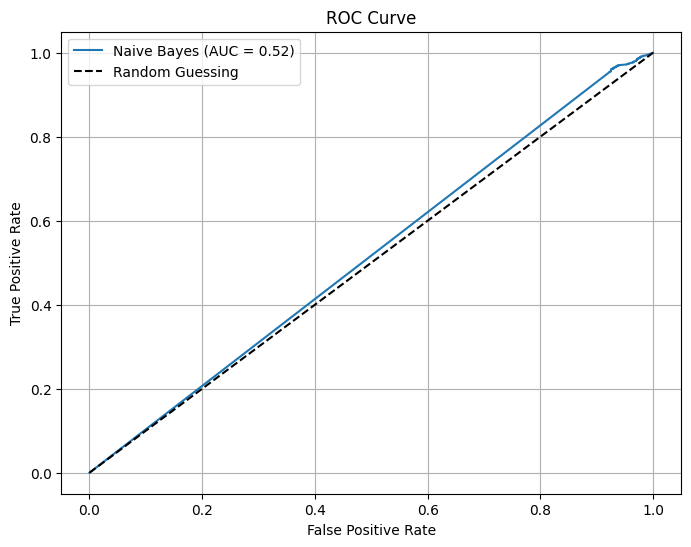

GaussianNB()

In [336]:
Naive(X_train, X_test, y_train, y_test)

In [337]:
from io import StringIO
import pydotplus
from IPython.display import Image

In [338]:
def visualize_dtree(reg, columns, sample_type, name = 'dt') :
    dot_data = StringIO()
    export_graphviz(reg, out_file = dot_data,
                    filled = True, rounded=True,
                    special_characters = True,feature_names = columns, class_names = ['Benign','Malware'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())
    graph.write_png(plots_path + sample_type + '/' + name + '.png')

Training Precision: 0.67
Test Precision: 0.67
Test Accuracy: 0.67
Test Recall: 0.99
ROC AUC Score: 0.51


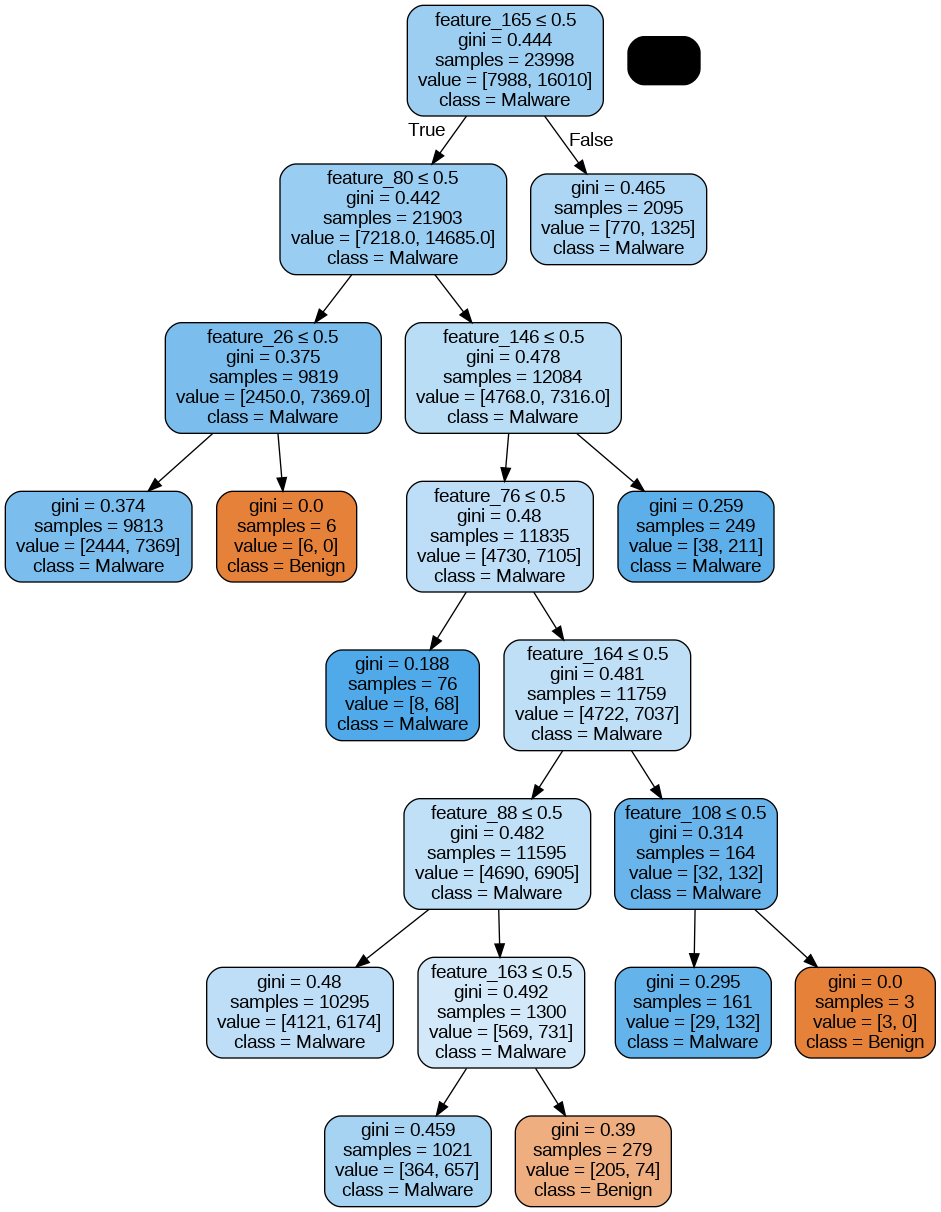

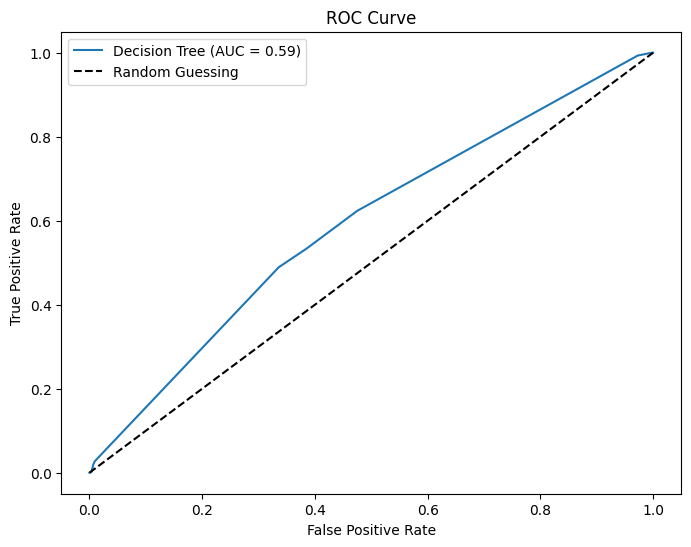

In [339]:
def dtree(X_train, X_test, y_train, y_test):
    reg = DecisionTreeClassifier(max_features='sqrt', max_depth=10, max_leaf_nodes=10).fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    y_predict_train = reg.predict(X_train)

    # Calculate performance metrics
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)

    # Print metrics
    print(f"Training Precision: {precision_train:.2f}")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")

    return reg

# Function to visualize decision tree
def visualize_dtree(reg, columns, sample_type, name='dt'):
    dot_data = StringIO()
    export_graphviz(reg, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])], class_names=['Benign', 'Malware'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # Display the decision tree
    display(Image(graph.create_png()))  # Use display() to render the image in Jupyter

    # Save the tree visualization to a file
    if not os.path.exists(plots_path + sample_type):
        os.makedirs(plots_path + sample_type)  # Create directory if it doesn't exist
    graph.write_png(plots_path + sample_type + '/' + name + '.png')

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_probs):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Fit the decision tree model
reg = dtree(X_train, X_test, y_train, y_test)

# Visualize the decision tree
visualize_dtree(reg, X_train.columns, 'unsampled')

# Plot the AUC curve for the decision tree model
plot_roc_curve(reg, X_test, y_test)

Training Precision: 0.67
Test Precision: 0.67
Test Accuracy: 0.67
Test Recall: 1.00
ROC AUC Score: 0.50


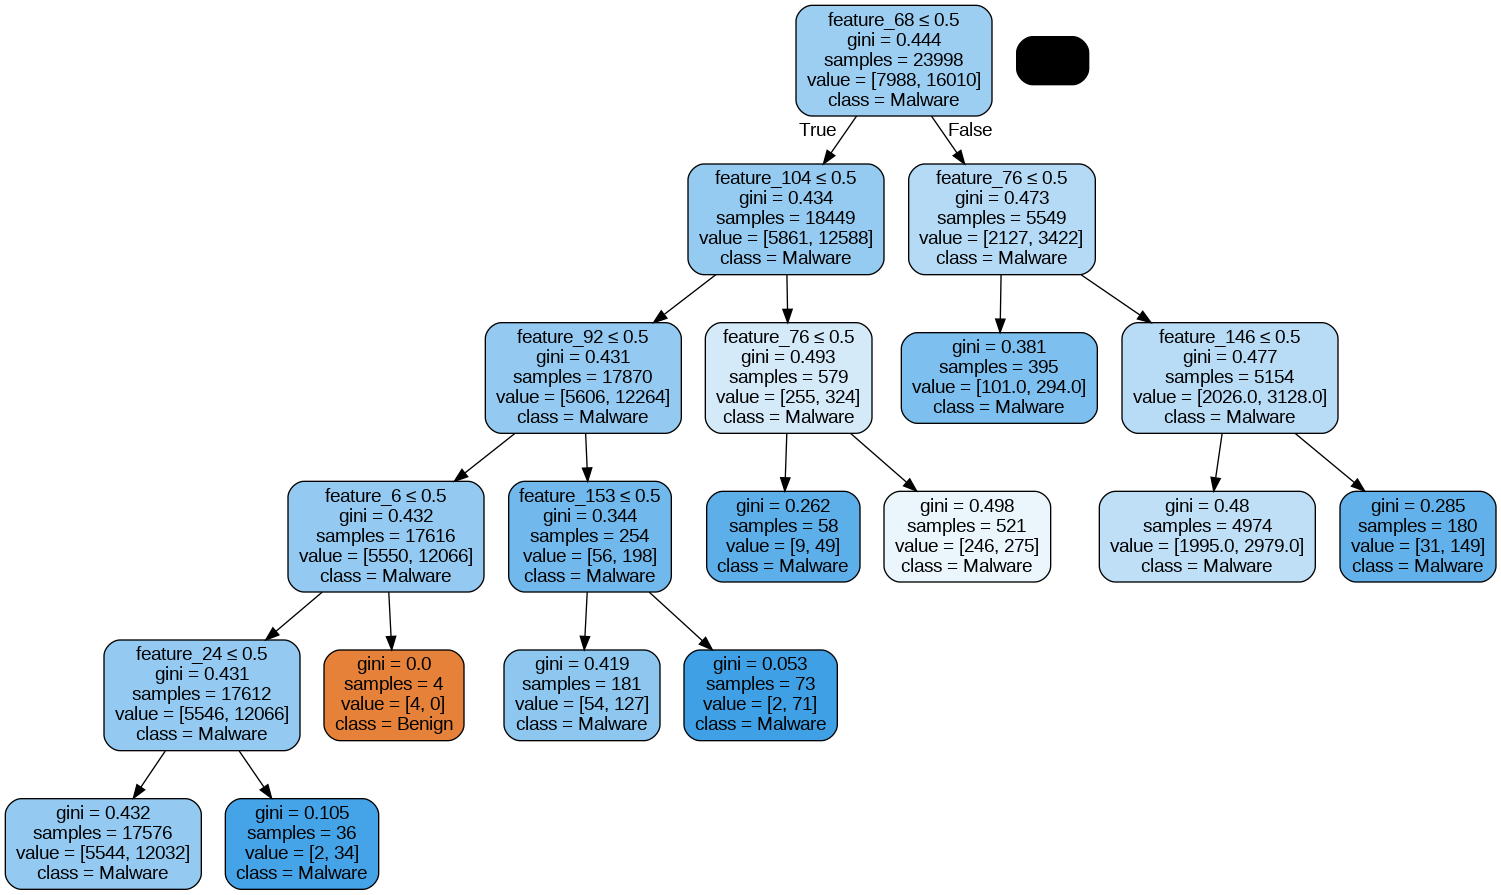

In [340]:
reg = dtree(X_train, X_test, y_train, y_test)
visualize_dtree(reg, df_permission.columns[:-1], unsampled)

**Sampling**

In [196]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [197]:
oversample = RandomOverSampler(sampling_strategy=0.9)
X_over, y_over = oversample.fit_resample(x, y)
X_over, y_over

(       Default : Access DRM content. (S)  \
 0                                      0   
 1                                      0   
 2                                      0   
 3                                      0   
 4                                      0   
 ...                                  ...   
 37995                                  0   
 37996                                  0   
 37997                                  0   
 37998                                  0   
 37999                                  0   
 
        Default : Access Email provider data (S)  \
 0                                             0   
 1                                             0   
 2                                             0   
 3                                             0   
 4                                             0   
 ...                                         ...   
 37995                                         0   
 37996                                    

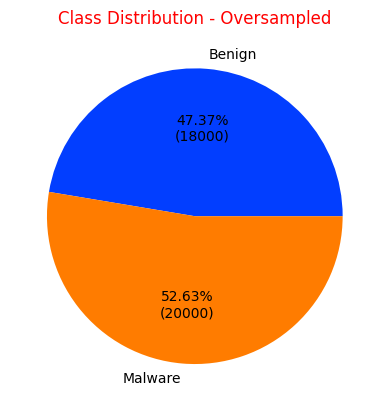

In [198]:
plot_class_distribution(y_over, oversampled)

In [275]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

Training Accuracy: 0.64
Test Accuracy: 0.61
Recall Score: 0.66
ROC AUC Score: 0.61


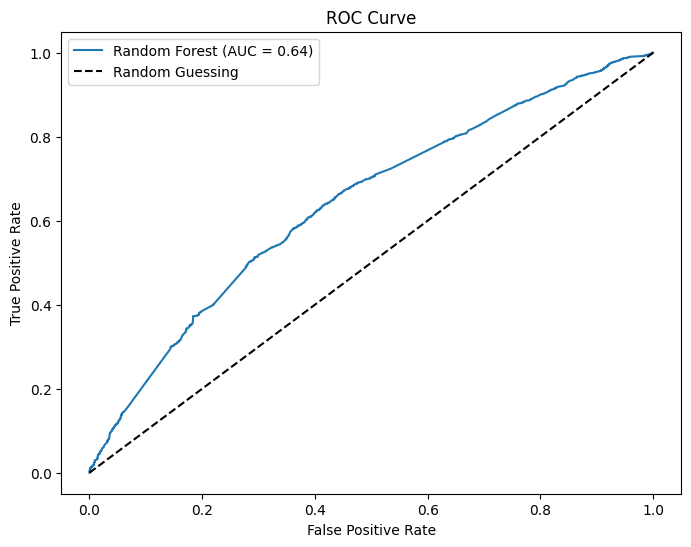

NameError: name 'rf_model' is not defined

In [276]:
logistic(X_over_train, X_over_test, y_over_train, y_over_test)

Training Precision: 0.53
Test Precision: 0.53
Test Accuracy: 0.53
Test Recall: 0.98
ROC AUC Score: 0.51


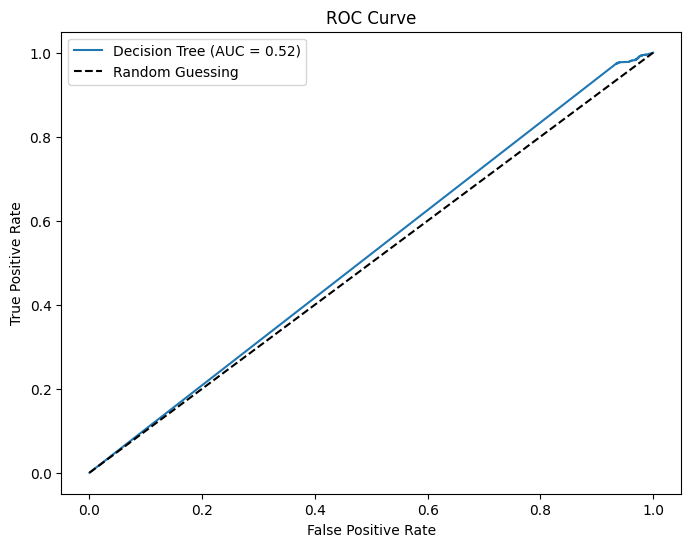

GaussianNB()

In [201]:
Naive(X_over_train, X_over_test, y_over_train, y_over_test)

Training Precision: 0.62
Test Precision: 0.61
Test Accuracy: 0.58
Test Recall: 0.55
ROC AUC Score: 0.58


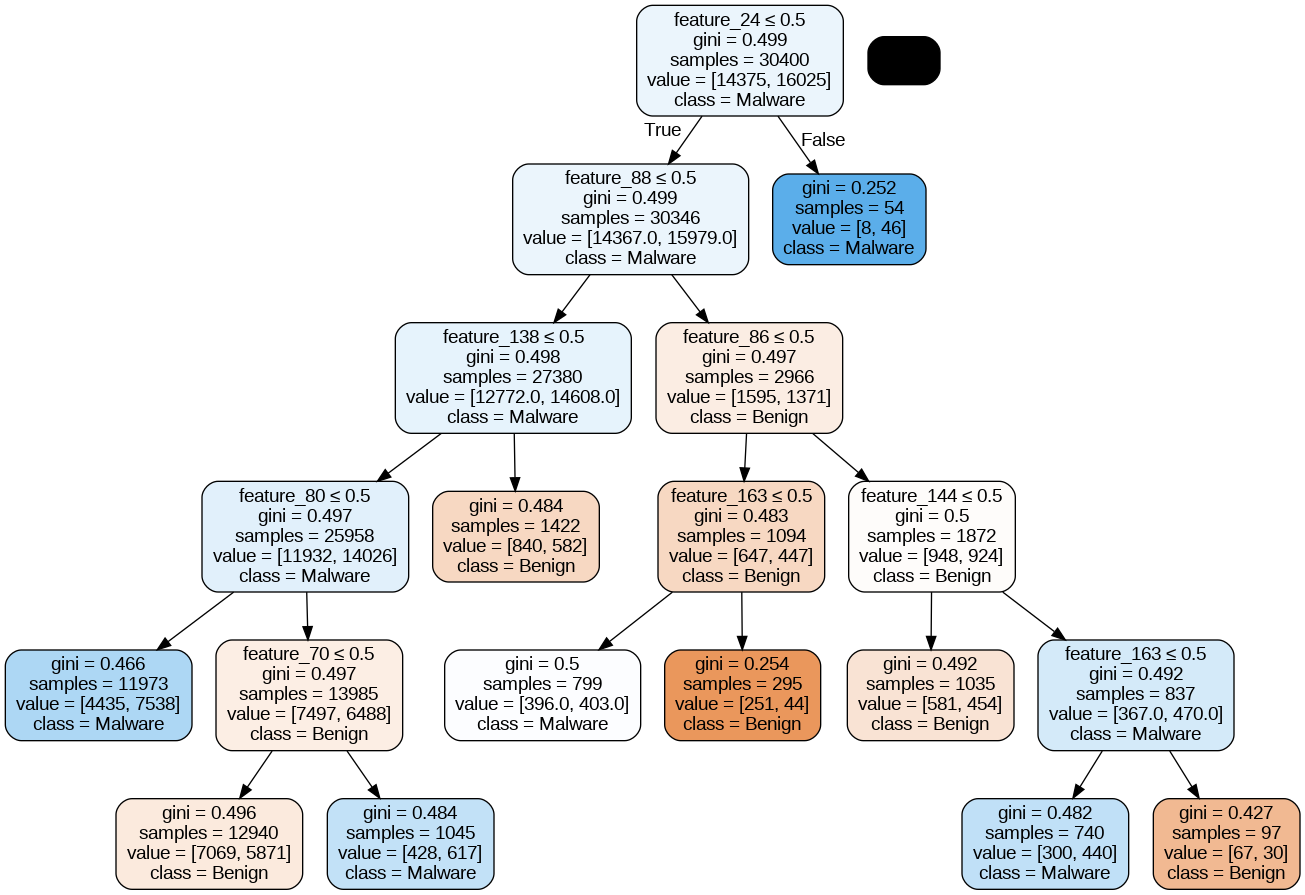

In [202]:
reg_over = dtree(X_over_train, X_over_test, y_over_train, y_over_test)
visualize_dtree(reg_over, df_permission.columns[:-1], oversampled)

In [204]:
undersample = RandomUnderSampler(sampling_strategy=0.9)
X_under, y_under = undersample.fit_resample(x, y)

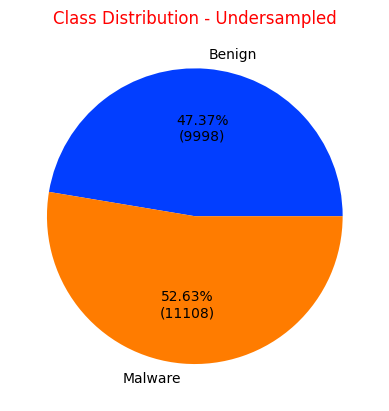

In [205]:
plot_class_distribution(y_under, undersampled)

In [206]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

Training Accuracy: 0.63
Test Accuracy: 0.62
Recall Score: 0.68
ROC AUC Score: 0.62


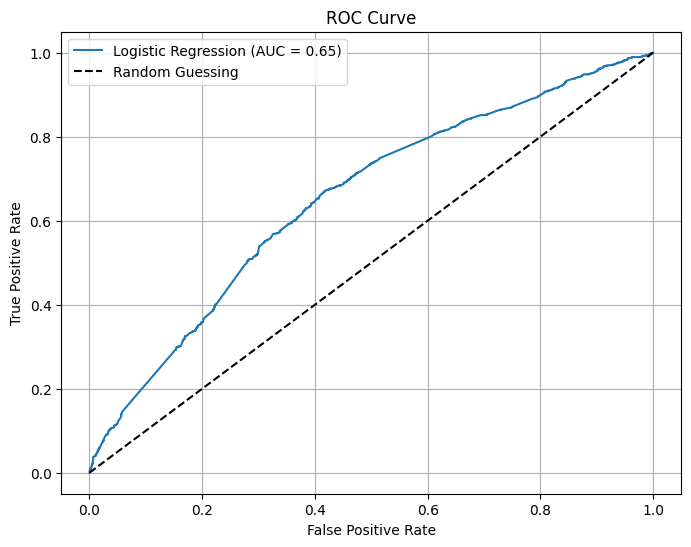

LogisticRegression(max_iter=200, n_jobs=-1)

In [303]:
logistic(X_under_train, X_under_test, y_under_train, y_under_test)

Training Precision: 0.53
Test Precision: 0.53
Test Accuracy: 0.53
Test Recall: 0.99
ROC AUC Score: 0.51


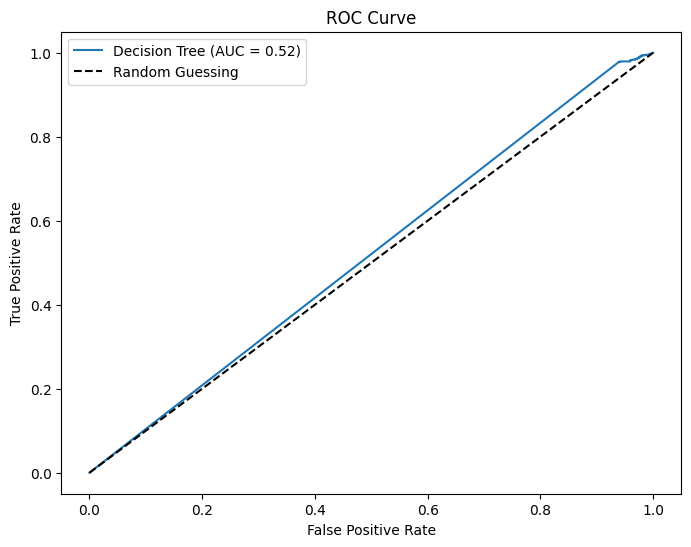

GaussianNB()

In [208]:
Naive(X_under_train, X_under_test, y_under_train, y_under_test)

Training Precision: 0.64
Test Precision: 0.64
Test Accuracy: 0.59
Test Recall: 0.50
ROC AUC Score: 0.59


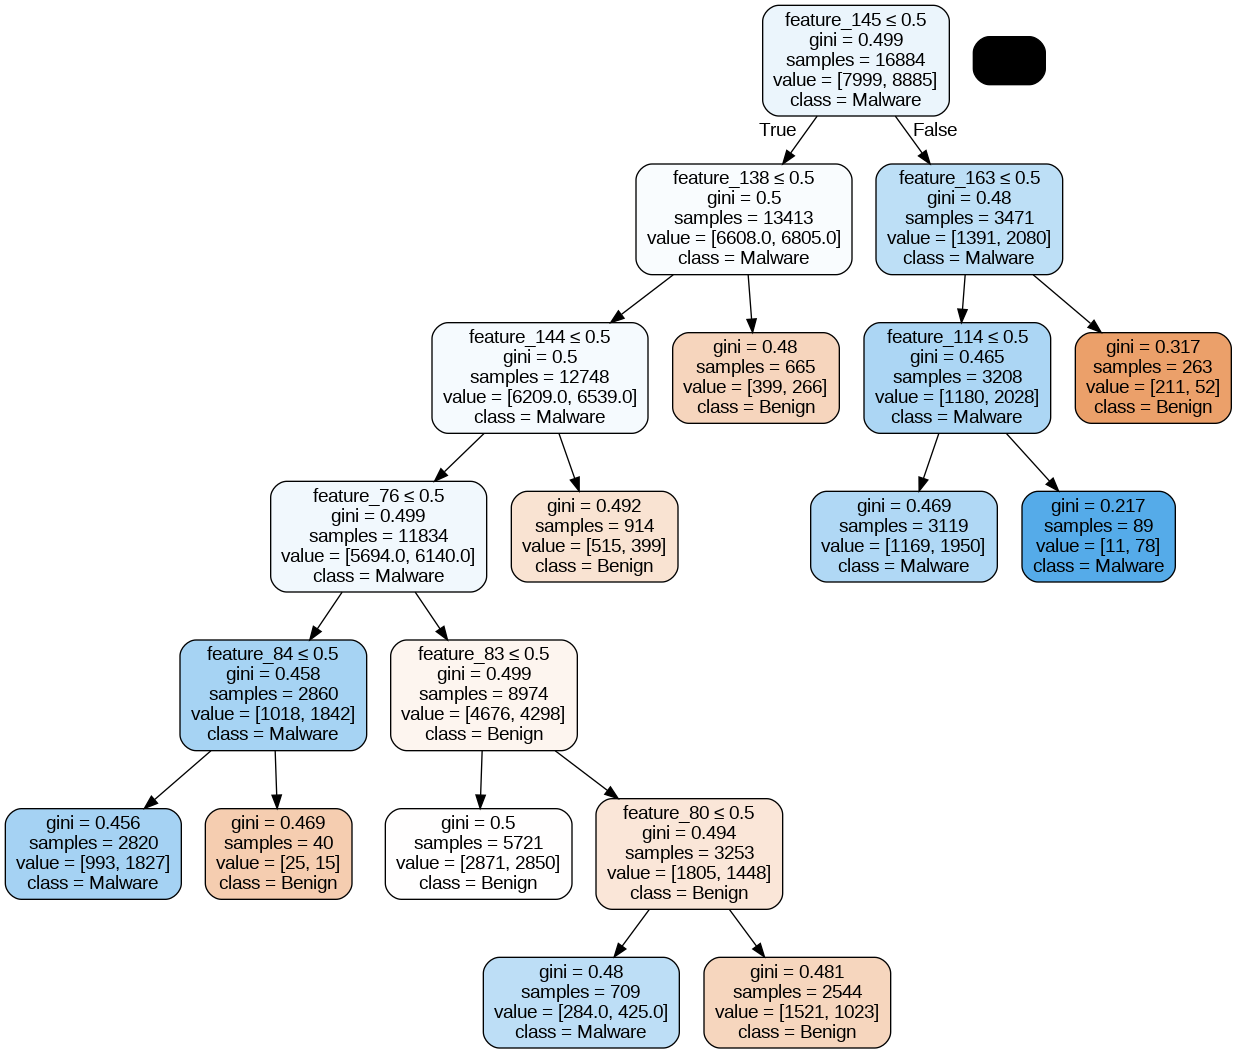

In [209]:
reg_under = dtree(X_under_train, X_under_test, y_under_train, y_under_test)
visualize_dtree(reg_under, df_permission.columns[:-1], undersampled)

**PCA**

In [295]:
from sklearn.decomposition import PCA

In [296]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(df_permission)
features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)
ratios = pca.explained_variance_ratio_*100
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.612592,-0.113919,0.341604,-0.264478,0.857759,0.033131,-0.894365,-0.872250,-0.206956,0.016809,...,0.017119,-0.020963,0.022428,-0.006393,-0.022476,-0.011236,0.008058,-0.005052,-0.010233,0.002447
1,0.537263,-0.959392,0.029070,0.163764,0.323698,0.395098,0.157825,-0.220064,-0.327654,-0.187691,...,-0.003473,0.001146,0.004858,-0.001154,0.000680,-0.006232,-0.004477,-0.002350,0.002181,-0.003524
2,-0.358122,-0.778455,0.548514,-0.176471,-0.047894,-0.134875,-0.342867,-0.042096,0.057210,-0.017441,...,0.000678,-0.000157,0.000483,0.000596,0.000645,-0.000037,-0.000497,-0.000149,-0.000814,-0.000172
3,-1.040884,-0.253041,-0.097812,-0.724516,0.334791,0.194505,0.031284,0.096886,0.074205,-0.345226,...,0.000634,-0.000427,0.000891,-0.000245,0.000724,0.000373,-0.000549,-0.000095,-0.000676,0.000246
4,-0.844238,0.216786,0.003093,0.138539,-0.138238,0.014237,-0.043550,-0.046193,-0.017493,0.413795,...,0.000956,0.000121,0.000653,-0.000540,-0.000177,0.000138,-0.000101,-0.000039,-0.000483,-0.000950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.471314,0.821622,0.374594,-0.089226,0.085963,0.102239,-0.276633,-0.164893,-0.012306,0.478833,...,0.002414,-0.004542,0.004982,-0.001990,-0.008764,-0.005125,-0.005355,0.007896,0.011295,-0.006591
29995,0.348794,-0.220970,-0.500583,0.631356,0.116301,-0.640473,-0.534902,0.440096,-0.520801,-0.092819,...,-0.003385,-0.000917,0.008576,-0.001500,-0.003917,-0.006576,-0.000950,0.002424,0.003186,-0.006735
29996,0.635056,-0.264675,-0.269934,0.659460,-0.189282,0.344642,0.225867,-0.264529,-0.094889,-0.457320,...,-0.000948,0.005870,-0.012625,-0.001719,-0.016890,-0.006481,0.002222,0.000447,0.006674,-0.000264
29997,-0.313022,1.042673,0.777041,-0.172007,0.250594,0.002835,0.052719,0.246948,-0.044287,0.309337,...,-0.000974,-0.000208,0.000725,-0.000910,-0.000963,0.001722,0.000483,0.000391,-0.000465,-0.000099


In [297]:
def plot_pca(features, ratios) :
    plt.xlabel('PCA features')
    plt.ylabel('variance Percentage')
    plt.xticks(features, rotation=70)
    name = 'PCA features vs Variance Percentage'
    plt.title(name)
    plt.tight_layout()
    plt.bar(features, ratios, color=sns.color_palette("flare"))
    plt.savefig(plots_path + name + '.png', bbox_inches = 'tight')
    plt.show()

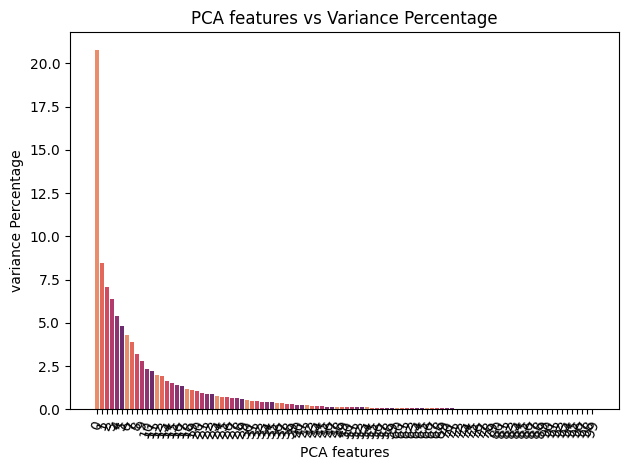

In [298]:
plot_pca(features, ratios)

In [282]:
temp_df=pd.DataFrame(pca.inverse_transform(principalComponents))
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.002689,0.000378,-2.371511e-15,0.001030,-0.000261,0.004049,-0.000523,1.905029e-16,0.001595,0.000416,...,0.000383,1.000103,-6.697938e-05,0.001348,-0.000214,-0.004287,-0.000022,0.999832,-0.001727,1.298842e-06
1,0.000708,0.000556,4.146388e-16,-0.001901,0.000058,-0.000927,0.000446,1.508526e-17,0.000683,0.000313,...,-0.000028,-0.000014,-2.256551e-05,-0.000730,0.002165,-0.000653,0.000148,0.000019,0.000855,1.454198e-07
2,0.000183,-0.000009,1.434920e-16,0.000195,0.000066,0.000107,-0.000120,-1.958132e-17,0.000267,0.000177,...,0.000005,-0.000001,-1.368271e-06,-0.000112,-0.000135,0.000016,0.000019,0.000005,0.000131,1.466148e-06
3,0.000194,0.000036,1.773165e-16,0.000031,0.000042,0.000051,-0.000087,-6.235354e-17,0.000208,0.000027,...,0.000009,-0.000001,-6.719173e-07,0.000175,-0.000105,0.000017,0.000018,0.000003,-0.000180,1.315858e-06
4,-0.000164,-0.000003,-1.654485e-16,0.000193,0.000010,-0.000026,-0.000025,-8.148151e-17,0.000006,0.000038,...,0.000005,-0.000001,-4.774931e-06,0.000009,0.000154,-0.000081,0.000010,0.000005,0.000038,9.999996e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,-0.000260,-0.000218,-1.460429e-15,-0.000586,0.000299,0.001231,-0.000836,1.029941e-15,0.001130,-0.000697,...,-0.000056,-0.000029,3.078669e-05,0.000652,0.001399,0.000891,0.000294,0.000048,-0.000245,1.000011e+00
29995,0.001423,0.000978,3.075559e-16,-0.000241,0.000214,-0.002009,0.000096,-7.861540e-17,0.000054,0.000363,...,0.000026,0.000029,-2.539919e-05,-0.001268,0.003341,-0.002058,0.000063,-0.000046,0.001299,9.999975e-01
29996,-0.001083,0.000607,7.002374e-16,-0.004716,-0.001154,-0.000628,0.002136,2.492945e-17,-0.000417,-0.001608,...,0.000226,0.000045,-2.953552e-05,-0.000454,0.000356,0.000232,-0.000005,-0.000029,0.000523,9.999950e-01
29997,0.000229,-0.000014,-7.978584e-16,-0.000324,-0.000050,0.000018,-0.000107,-1.782499e-16,0.000152,-0.000006,...,0.000002,0.000005,7.252903e-06,-0.000311,-0.000032,-0.000315,0.000031,0.000002,0.000358,9.999991e-01


In [283]:
temp_df[temp_df<=0]=0
temp_df[temp_df!=0]=1

In [284]:
temp_df=temp_df.astype(int)
temp_df.index=df['App']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
App,,,,,,,,,,,,,,,,,,,,,
Canada Post Corporation,1,1,0,1,0,1,0,1,1,1,...,1,1,0,1,0,0,0,1,0,1
Word Farm,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,1,0,1,1,1,1
Fortunes of War FREE,1,0,1,1,1,1,0,0,1,1,...,1,0,0,0,0,1,1,1,1,1
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,...,1,0,0,1,0,1,1,1,0,1
Boxing Day,0,0,0,1,1,0,0,0,1,1,...,1,0,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,...,1,1,0,0,1,0,1,0,1,1
Super Task Killer FREE,0,1,1,0,0,0,1,1,0,0,...,1,1,0,0,1,1,0,0,1,1


In [302]:
print(df.isnull().sum())

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Price_numeric                                                            0
Length: 185, dtype: int64


In [301]:
df_y=df['Class']
df_y.index=df['App']

In [300]:
df_feature=pd.concat([temp_df.iloc[:,:10],df_y],axis=1)
df_feature

,0,1,2,3,4,5,6,7,8,9,Class
App,,,,,,,,,,,
Canada Post Corporation,1,1,0,1,0,1,0,1,1,1,0
Word Farm,1,1,1,0,1,0,1,1,1,1,0
Fortunes of War FREE,1,0,1,1,1,1,0,0,1,1,0
Better Keyboard: Avatar Purple,1,1,1,1,1,1,0,0,1,1,0
Boxing Day,0,0,0,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Beechwood Hotel,0,0,0,0,1,1,0,1,1,0,1
ZDefense: Tower Defense,1,1,1,0,1,0,1,0,1,1,1
Super Task Killer FREE,0,1,1,0,0,0,1,1,0,0,1


In [288]:
X_feature=df_feature.iloc[:,:-1]
y_feature=df_feature.iloc[:,-1]

In [305]:
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42)
X_feature_train.shape,X_feature_test.shape,y_feature_train.shape,y_feature_test.shape


((23999, 10), (6000, 10), (23999,), (6000,))

Training Accuracy: 0.79
Test Accuracy: 0.78
Recall Score: 0.91
ROC AUC Score: 0.71


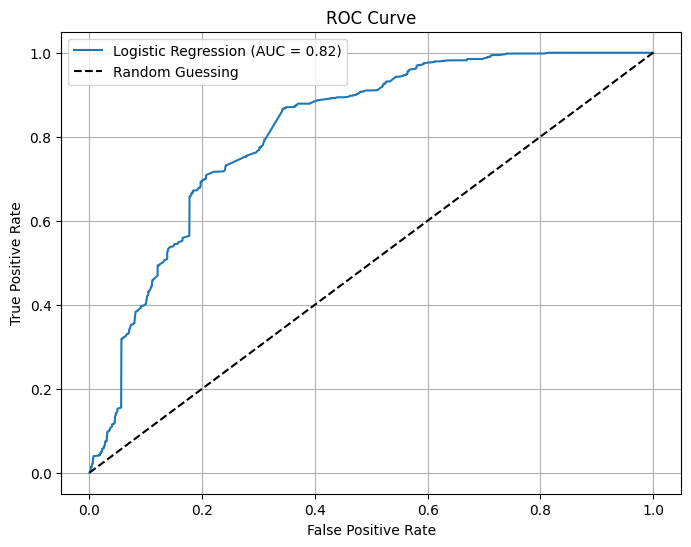

LogisticRegression(max_iter=200, n_jobs=-1)

In [308]:
logistic(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Precision: 0.78
Test Precision: 0.79
Test Accuracy: 0.72
Test Recall: 0.79
ROC AUC Score: 0.69


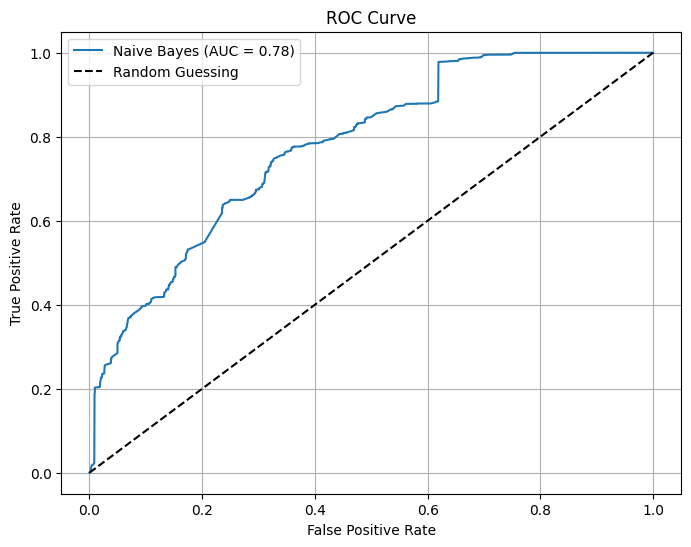

GaussianNB()

In [319]:
Naive(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

In [273]:
reg_feature = dtree(X_feature_train, X_feature_test, y_feature_train, y_feature_test)
visualize_dtree(reg_feature, df_feature.columns[:-1], unsampled, 'pca_dt')

ValueError: Number of labels=23999 does not match number of samples=23998

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
def randomforest(X_train, X_test, y_train, y_test):
    # Train the Random Forest model
    reg = RandomForestClassifier(n_estimators=200, n_jobs=-1).fit(X_train, y_train)

    # Make predictions
    y_predict = reg.predict(X_test)
    y_predict_train = reg.predict(X_train)

    # Calculate performance metrics
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)

    # Print metrics
    print(f"Training Precision: {precision_train:.2f}")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Recall Score: {recall:.2f}")
    print(f'ROC AUC Score: {roc_auc:.2f}')

    # Plot ROC curve
    plot_roc_curve(reg, X_test, y_test)

    return reg

def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Training Precision: 0.86
Test Precision: 0.85
Test Accuracy: 0.85
Recall Score: 0.93
ROC AUC Score: 0.81


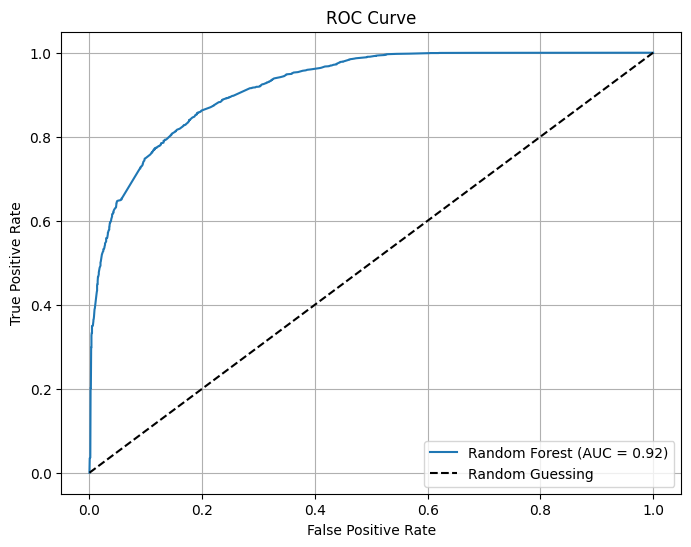

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [342]:
randomforest(X_feature_train, X_feature_test, y_feature_train, y_feature_test)


In [250]:
import xgboost as xgb

In [ ]:
def xgboost(X_train, X_test, y_train, y_test) :
    reg = GridSearchCV(estimator = xgb.XGBClassifier(scale_pos_weight = 0.5, n_jobs = -1), param_grid={}, cv = 10)
    reg = reg.fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [249]:
xgboost(X_train, X_test, y_train, y_test)

Training Accuracy 0.80
Test Accuracy 0.77
Recall Score 0.64
ROC Score 0.63


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={})

In [ ]:
xgboost(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.98
Test Accuracy 0.98
Recall Score 0.94
ROC Score 0.96


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={})

In [345]:
from sklearn import svm

In [348]:
def svm_classifier(X_train, X_test, y_train, y_test):
    # Train the SVM model
    reg = svm.SVC(probability=True).fit(X_train, y_train)

    # Make predictions
    y_predict = reg.predict(X_test)
    y_predict_train = reg.predict(X_train)

    # Calculate performance metrics
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)

    # Print metrics
    print(f"Training Precision: {precision_train:.2f}")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Recall Score: {recall:.2f}")
    print(f'ROC AUC Score: {roc_auc:.2f}')

    # Plot ROC curve
    plot_roc_curve(reg, X_test, y_test)

    return reg

def plot_roc_curve(model, X_test, y_test):
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'SVM (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [349]:
svm_classfier(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.84
Test Accuracy 0.85
Recall Score 0.95
ROC Score 0.80


SVC()

In [352]:
from sklearn.neural_network import MLPClassifier

In [355]:
def mlp(X_train, X_test, y_train, y_test) :
    reg = MLPClassifier(random_state = 42, max_iter = 300).fit(X_train,y_train)
    y_predict=reg.predict(X_test)
    y_predict_train=reg.predict(X_train)
    precision_train = precision_score(y_train, y_predict_train)
    precision = precision_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    roc_auc=roc_auc_score(y_test, y_predict)
    print(f"Training Accuracy %.2f"%(precision_train))
    print(f"Test Accuracy %.2f"%(precision))
    print(f"Recall Score %.2f"%(recall))
    print(f'ROC Score %.2f'%(roc_auc))
    return reg

In [356]:
mlp(X_feature_train, X_feature_test, y_feature_train, y_feature_test)

Training Accuracy 0.85
Test Accuracy 0.84
Recall Score 0.94
ROC Score 0.79


MLPClassifier(max_iter=300, random_state=42)